# Trading Strategies

Assume that we have a Brownian motion model for stock price:
$$
dS = \mu S_t + \sigma S_t dW.
$$
We try to model a trading strategy by tracking the number $\Delta_t$ of stocks we hold at time $t$, and the amount of money in our bank account $B_t$ at time $t$. We can define our wealth at time $t$ to be 
$$
W_t = \Delta_t S_t + B_t
$$
	

Here in this notebook we can test and run trading strategies on simulated stock data.
 - Total time $t\in[0,1]$
 - One hundred steps in each run
 - Use the model for stock price as above
 - We restart each simulation run with the same parameters
 
The algorithm is as follows:
 - Initialise values $S_0=1$, $W_0=20$, $B_0=10$, $\Delta_0=10$
 - For i=0 to i=99
    - $S_{i+1}=S_{i} + dS$ where $dS$ is a random number
    - $\Delta_{i+1}=\Delta_{i} + T(S,W,B,\Delta)$
    - $B_{i+1}=B_{i} - T(S,W,B,\Delta)S_{i+1}$
    - $W_{i+1}= \Delta_{i+1} S_{i+1} + B_{i+1}$
 - Output $W_{100}$, the final value of wealth

We are interested in the value of $W$ at the end of the simulation, as this indicates our winnings. If $W_{100}>20$ then this means we have made a profit on our initial investment.
   
Try to think about what is a good result -- do you expect the strategy to always win or just win on average? What does it mean if there is a large variation in returns?

## Using this notebook

The notebook contains "cells", and in each cell there is either information (like this) or code. You can run the code in the notebook, as well as editing and rerunning it. The notebook will work best if you first run each cell in the order they appear. You can then click on a cell and run it again if you have changed anything.

In [1]:
from MathFinanceWorkshop import MFW_Simulation
import numpy as np
ModelBuying = MFW_Simulation()

First lets consider a simple strategy, where
$$
T(S,W,B,\Delta) = 1.
$$
The code for this would be written:
~~~
def tradingStrategy(St,Wt,Bt,delta_t):
        return 1
~~~
Now lets see how it works some simulated data. We can run a few simulations by issuing the command:
~~~
Model.plotSimulation( number of simulations, mu , sigma )
~~~
putting in whatever numbers we want. For instance we run it in the next cell with 10 simulations, $\mu=0.1$, and $\sigma=0.2$.

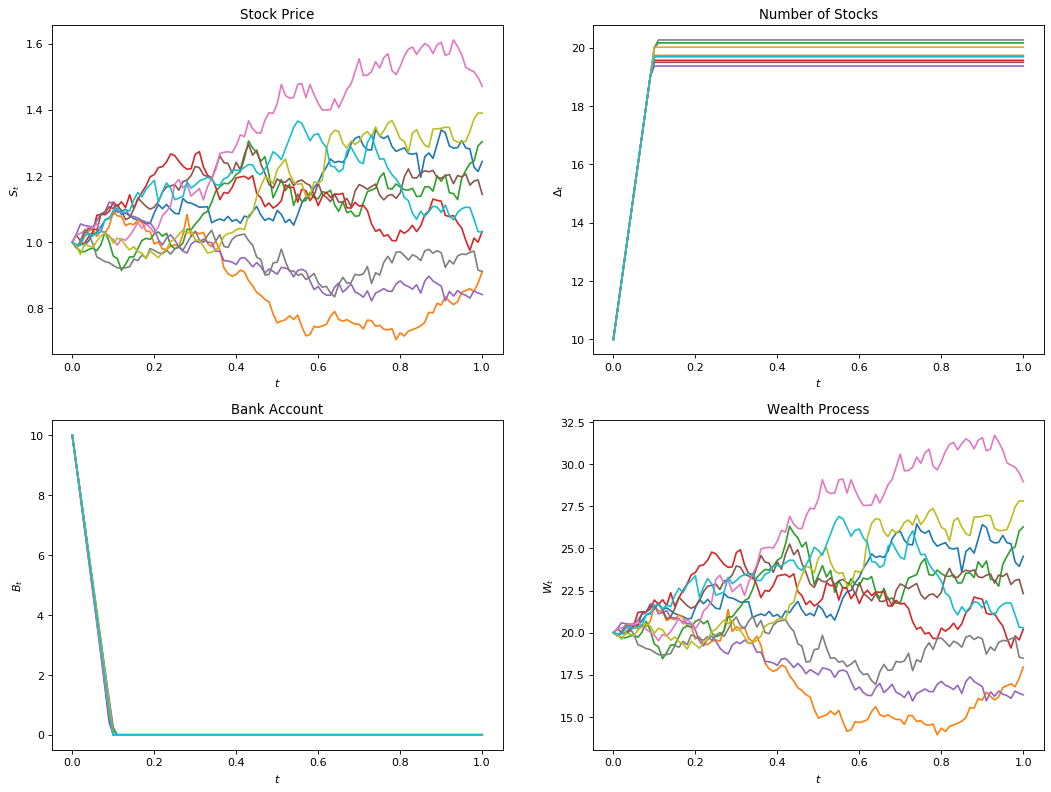

In [2]:
mu = 0.1
sigma = 0.2
ModelBuying.plotSimulation(10,mu,sigma)

If you want to see what happens over a large number of simulations, we can plot out some statistics using the following

 Strategy generates average return  10.28641542592483 % and a volatility of  21.82331347768234 %


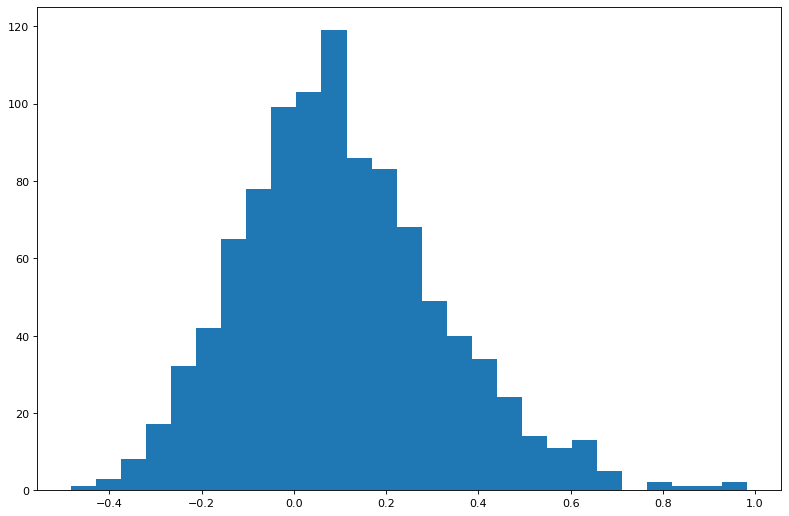

In [3]:
ModelBuying.statsSimulation(1000,mu,sigma)

## Tasks

1. Some of the strategies end up with more or less than 20 shares. Can you explain why this number is sometimes different?
2. How does this strategy perform for different values if you choose different values of $\mu$ and $\sigma$?

# Creating Your Own Strategy

Obviously this is a very simple stragegy, and we would like to try out some different strategies. The next most simple strategy to create is one that just sells everything. In code this would be 
~~~
def tradingStrategy(St,Wt,Bt,delta_t):
    # minus one here means that we will reduce delta
    return -1
~~~
but we want to overwrite the strategy in "MFW_Simulation". To do this we create a new class (you don't need to understand this), inheriting functionality from "MFW_Simulation". The code will look like:

In [6]:
# "Selling" is the name of class
class Selling(MFW_Simulation):
    # we redefine the trading strategy in here
    def tradingStrategy(self,St,Wt,Bt,delta_t):
        # inside here is where you should make edits
        # this example is another simple strategy, which is to sell as many assets as possible.
        return -1
ModelSelling = Selling()

The final line names this model as "ModelSelling", so can run the plot and stats function to see what this looks like. First we run the plot function.

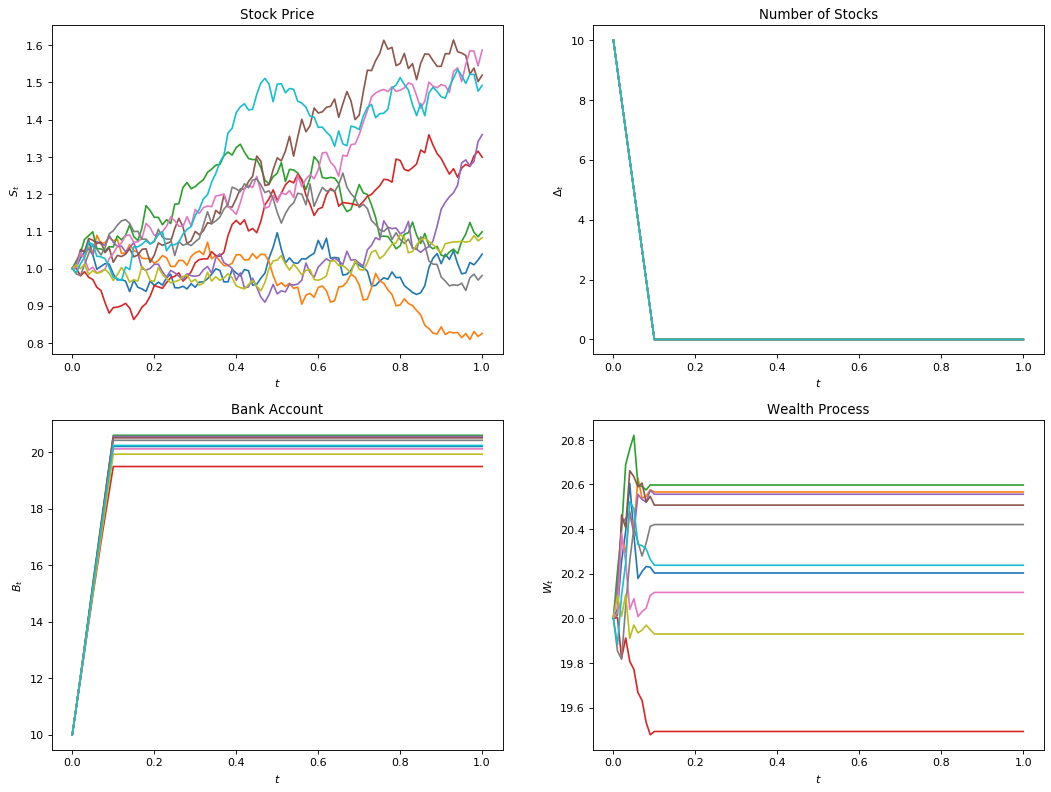

In [7]:
ModelSelling.plotSimulation(10,0.1,0.2)

# Tasks

1. Run the "statsSimulation" on "Modelnew". How does this strategy compare to the previous strategy?
2. Try out some of the strategies below, you could try adapting or combining them to improve the returns. For instance, you could buy low and sell high.

In [8]:
# In "BuyLow", we check the value of stock at the current time 
# compared to the value at the start, and only buy if St < 0.95 S_0
class BuyLow(MFW_Simulation):
    # we redefine the trading strategy in here
    def tradingStrategy(self,St,Wt,Bt,delta_t):
        # we can get current price of stock using notation St[-1]
        Scurrent = St[-1]
        # initial price of stock is S[0]
        Sinitial = St[0]
        # check if stock price is low
        if Scurrent < 0.95 * Sinitial:
            return 1
        else:
            return 0
ModelBuyLow = BuyLow()

In [9]:
# In "SellHigh", we check the value of stock at the current time 
# compared to the value at the start, and only sell if St > 1.1 S_0
class SellHigh(MFW_Simulation):
    # we redefine the trading strategy in here
    def tradingStrategy(self,St,Wt,Bt,delta_t):
        # we can get current price of stock using notation St[-1]
        Scurrent = St[-1]
        # initial price of stock is S[0]
        Sinitial = St[0]
        # check if stock price is low
        if Scurrent > 1.1 * Sinitial:
            return 1
        else:
            return 0
ModelSellHigh = SellHigh()